In [43]:
import pandas as pd

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
df = pd.read_csv("../raw_analyst_ratings.csv")  # notebook is inside /notebooks
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [46]:
df = df.drop(columns=['Unnamed: 0', 'url'])


In [47]:
# Convert 'date' column to datetime for time-based analysis
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

In [48]:
# Create a new column for headline length (number of characters)
df['headline_length'] = df['headline'].str.len()

In [49]:
# Display first few rows to check
df.head()

,headline,publisher,date,stock,headline_length
0,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39
1,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42
2,71 Biggest Movers From Friday,Lisa Levin,2020-05-26 08:30:07+00:00,A,29
3,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,2020-05-22 16:45:06+00:00,A,44
4,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87


In [50]:
# we can take a random sample to make EDA faster.
df_sample = df.sample(n=2000, random_state=42)

# -------------------------------
# 4️⃣ Descriptive Statistics
# -------------------------------


In [51]:
# 4a — Headline length statistics
print(df_sample['headline_length'].describe())


count    2000.0000
mean       72.4080
std        40.3679
min        14.0000
25%        47.0000
50%        64.0000
75%        86.0000
max       397.0000
Name: headline_length, dtype: float64


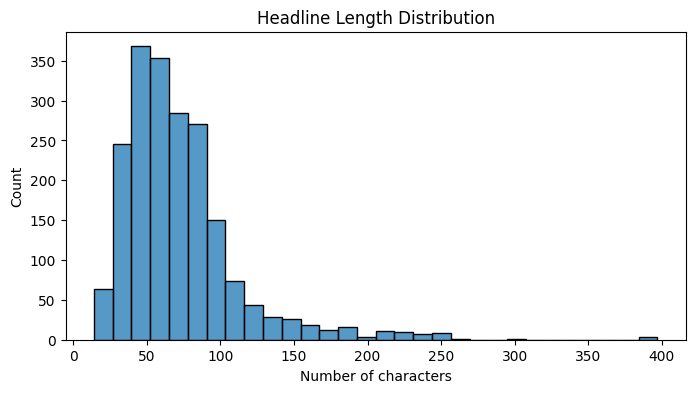

In [52]:
# Plot distribution of headline length
plt.figure(figsize=(8,4))
sns.histplot(df_sample['headline_length'], bins=30)
plt.title("Headline Length Distribution")
plt.xlabel("Number of characters")
plt.show()



In [53]:
# 4b — Publisher counts
publisher_counts = df_sample['publisher'].value_counts()

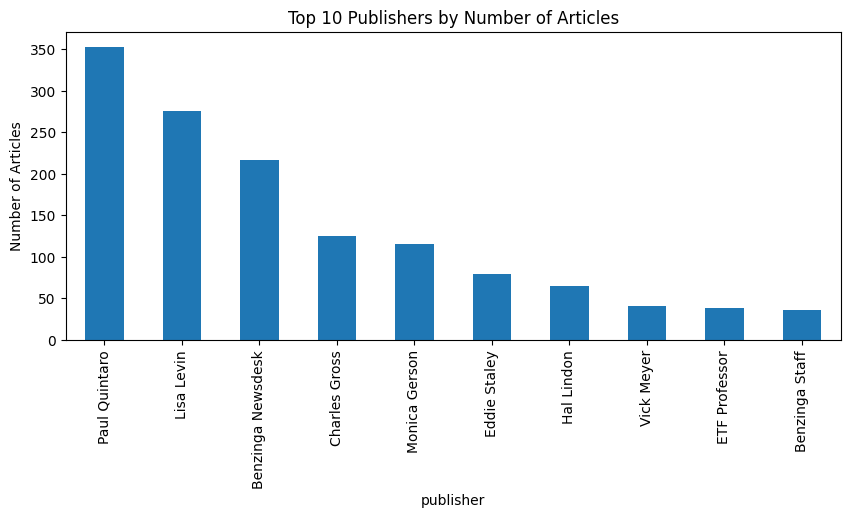

In [54]:
# Plot top 10 publishers by number of articles
publisher_counts.head(10).plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Publishers by Number of Articles")
plt.ylabel("Number of Articles")
plt.show()


In [55]:
# 4c — Articles published over time
daily_counts = df_sample.groupby(df_sample['date'].dt.date).size()


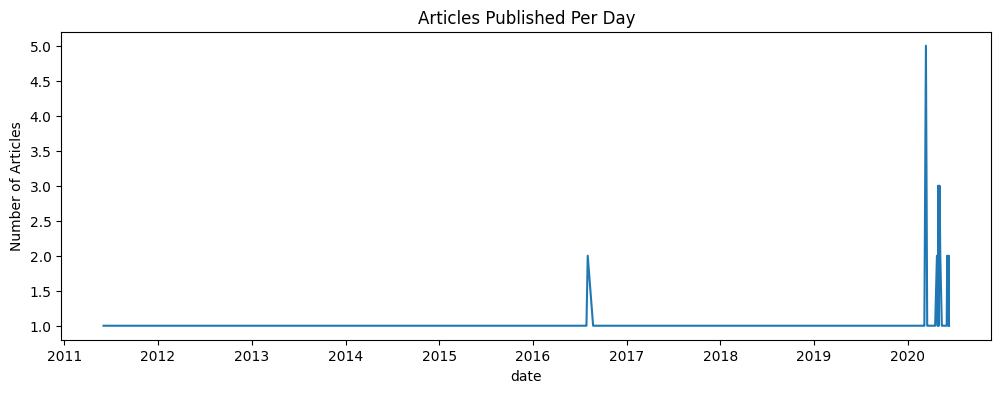

In [56]:
# Plot articles per day
daily_counts.plot(figsize=(12,4))
plt.title("Articles Published Per Day")
plt.ylabel("Number of Articles")
plt.show()

# -------------------------------
# 5️⃣ Text Analysis / Topic Modeling
# -------------------------------

In [57]:
# Extract keywords / noun phrases from headlines
df_sample['keywords'] = df_sample['headline'].apply(lambda x: TextBlob(x).noun_phrases)


In [58]:
from textblob import download_corpora
download_corpora.download_all()


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Dibekulu\AppData\Roaming\nltk_data...
[nltk_data]   Package mo

In [59]:
df_sample['keywords'] = df_sample['headline'].apply(lambda x: TextBlob(x).noun_phrases)


In [60]:
# Count most frequent keywords
from collections import Counter

In [61]:
# Flatten list of all keywords
all_keywords = [k for sublist in df_sample['keywords'] for k in sublist]


In [62]:
# Display top 20 keywords
print(Counter(all_keywords).most_common(20))

[('stocks', 176), ('est', 171), ('vs $', 90), ('up', 81), ('update', 71), ('benzinga', 58), ('buy', 52), ('down', 52), ('shares', 50), ('earnings scheduled', 45), ('top', 43), ('estimate', 42), ('pre-market session', 37), ('eps', 35), ('announces', 33), ('raises pt', 33), ('yoy', 32), ('new 52-week', 31), ('lows', 31), ('yesterday', 31)]


# -------------------------------
# 6️⃣ Publishing Time Analysis (optional)
# -------------------------------

In [63]:
# Extract hour from 'date' column if time component exists
df_sample['hour'] = df_sample['date'].dt.hour

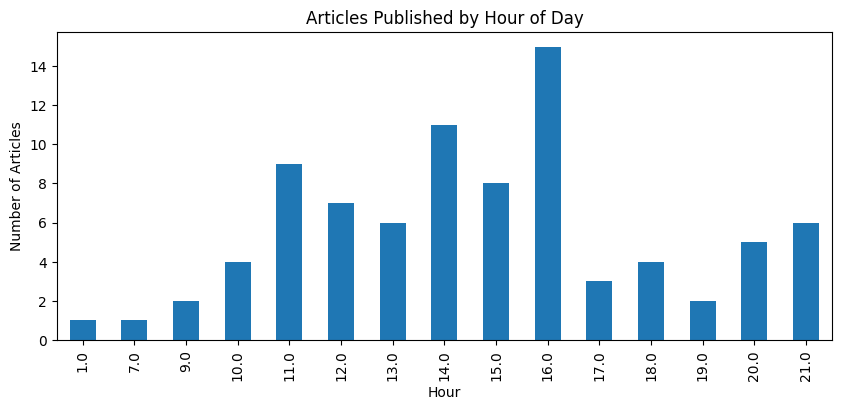

In [64]:
# Count articles by hour
df_sample['hour'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Articles Published by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()

# -------------------------------
# 7️⃣ Partial Task-2: Stock Indicators
# -------------------------------

In [65]:
import yfinance as yf
import talib as ta

In [66]:
# Pick first stock symbol from sample
ticker = df_sample['stock'].iloc[0]

In [67]:
# Download stock data from Yahoo Finance based on our dataset timeline
start_date = df_sample['date'].min().date()  # earliest news date
end_date = df_sample['date'].max().date()    # latest news date

stock = yf.download(ticker, start=start_date, end=end_date)



C:\Users\Dibekulu\AppData\Local\Temp\ipykernel_6756\1694597754.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


# -------------------------------
# Compute basic technical indicators
# -------------------------------


In [68]:
# Moving Average (MA20)
import talib as ta

# Ensure 'Close' is a 1D array
close_prices = stock['Close'].values.flatten()

# Moving Average (MA20)
stock['MA20'] = ta.SMA(close_prices, timeperiod=20)

# Relative Strength Index (RSI14)
stock['RSI14'] = ta.RSI(close_prices, timeperiod=14)

# MACD
stock['MACD'], stock['MACD_signal'], stock['MACD_hist'] = ta.MACD(close_prices)


In [69]:
# Relative Strength Index (RSI14)
import talib as ta
import numpy as np

# Convert 'Close' to a proper 1D array
close_prices = stock['Close'].values.flatten()  # flatten ensures 1D

# RSI14
stock['RSI14'] = ta.RSI(close_prices, timeperiod=14)

# Optional: also compute SMA20 and MACD safely
stock['MA20'] = ta.SMA(close_prices, timeperiod=20)
stock['MACD'], stock['MACD_signal'], stock['MACD_hist'] = ta.MACD(close_prices)


In [70]:
# Moving Average Convergence Divergence (MACD)
stock['MACD'], stock['MACD_signal'], stock['MACD_hist'] = ta.MACD(stock['Close'].squeeze())


# -------------------------------
# Plot stock price + MA20
# -------------------------------

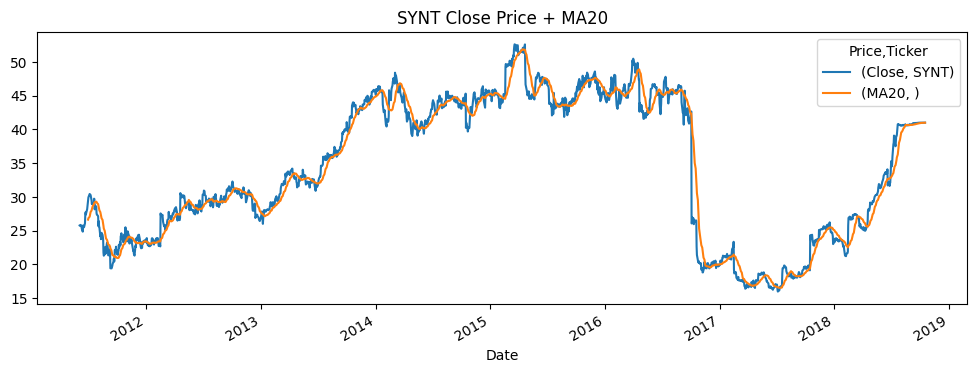

In [71]:
stock[['Close','MA20']].plot(title=f"{ticker} Close Price + MA20", figsize=(12,4))
plt.show()

# -------------------------------
# Plot RSI
# -------------------------------

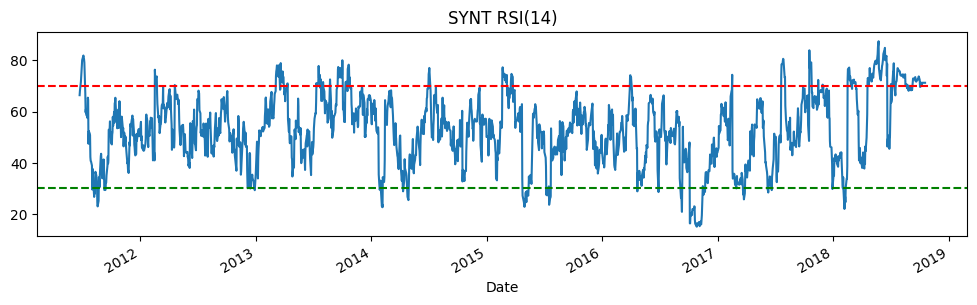

In [72]:
stock['RSI14'].plot(title=f"{ticker} RSI(14)", figsize=(12,3))
plt.axhline(70, color='red', linestyle='--')  # overbought threshold
plt.axhline(30, color='green', linestyle='--')  # oversold threshold
plt.show()

# -------------------------------
# Plot MACD
# -------------------------------

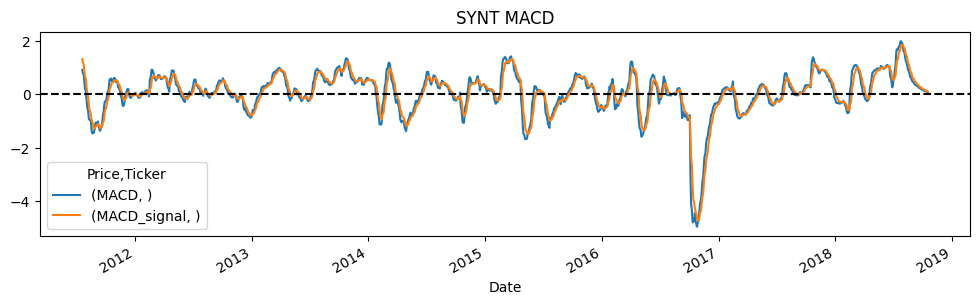

In [73]:
stock[['MACD','MACD_signal']].plot(title=f"{ticker} MACD", figsize=(12,3))
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [74]:
df_sample.to_csv("../data_sample_for_repo.csv", index=False)
